In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

%matplotlib inline

In [2]:
ACCRE=pd.read_csv('data/clean_ACCRE_data.csv')

In [3]:
def array_jobs(job):
    array_split=job.split('_')
    if len(array_split)==2:
        jobs=job#array_split
    else:
        jobs=0
        
    return jobs

In [4]:
%%time 
ACCRE.JOBID= ACCRE.JOBID.apply(array_jobs)

CPU times: user 1.63 s, sys: 21.2 ms, total: 1.65 s
Wall time: 1.66 s


In [5]:
ACCRE.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,0,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [6]:
ACCRE.drop(ACCRE[ACCRE['JOBID']==0].index, inplace=True)

In [7]:
ACCRE.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06
5,7055502_1823,discovery,serina,12288.0,7693.11,1188000,789220,1,1,production,0:0,2019-03-11T10:06:06


In [8]:
ACCRE.shape

(2575548, 12)

In [9]:
ACCRE[['number','sub_number']]=ACCRE.JOBID.str.split('_', expand=True)

In [10]:
ACCRE.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,number,sub_number
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59,6983193,1880
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06,7055502,1863
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06,7055502,1800
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06,7055502,1806
5,7055502_1823,discovery,serina,12288.0,7693.11,1188000,789220,1,1,production,0:0,2019-03-11T10:06:06,7055502,1823


In [11]:
ACCRE.shape

(2575548, 14)

In [12]:
ACCRE=ACCRE[ACCRE.USEDTIME < 300]

In [13]:
ACCRE.shape

(696855, 14)

In [14]:
#groupby account number and user 
ACCRE=ACCRE.groupby(['number','USER','EXITCODE'], as_index=False)[['ACCOUNT']].count()

In [15]:
ACCRE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17488 entries, 0 to 17487
Data columns (total 4 columns):
number      17488 non-null object
USER        17488 non-null object
EXITCODE    17488 non-null object
ACCOUNT     17488 non-null int64
dtypes: int64(1), object(3)
memory usage: 683.1+ KB


In [16]:
ACCRE.head()

,number,USER,EXITCODE,ACCOUNT
0,10000883,boyce,0:0,6
1,10007652,stacey,0:0,1
2,10007726,stacey,0:0,2
3,10007826,gerrit,0:0,50
4,10008050,gerrit,0:0,50


In [17]:
# Above, this column equals the total number of jobs/arrays for that 'number' or group 
# within 5 min 


In [18]:
ACCRE=ACCRE[ACCRE.ACCOUNT > 500]
# Here we want the number of jobs > 500 of the less than 5 min criteria 

In [19]:
ACCRE.head()

,number,USER,EXITCODE,ACCOUNT
30,10021254,demarcus,0:0,6297
54,10081102,lashawn,0:0,1200
64,10094343,demarcus,0:0,6046
65,10100906,demarcus,0:0,7606
66,10100910,demarcus,0:0,7548


In [20]:
Offenders=ACCRE.groupby('USER')[['number']].count()
# 'number' is the # of times that the USER committed the criteria. 
Offenders

,number
USER,
alf,3
alisson,1
archie,2
baylee,7
benson,19
boyce,31
brande,22
demarcus,7
hjalmar,2


In [21]:
Offenders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, alf to whitley
Data columns (total 1 columns):
number    22 non-null int64
dtypes: int64(1)
memory usage: 352.0+ bytes


## So above is your answer to part 1(a)

In [25]:
# Run this later 
# Offenders[Offenders['EXITCODE']=='0:0']
# No failed jobs with EXITCODE 0:0 that fit the criteria 

In [30]:
ACCRE_badexit=pd.read_csv('data/clean_ACCRE_data.csv')

In [31]:
ACCRE_badexit.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06


In [32]:
ACCRE_badexit=ACCRE_badexit[ACCRE_badexit['EXITCODE']!='0:0']

In [33]:
ACCRE_badexit.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
16652,7269184,atemoyas,benson,1024.0,1023.83,1500,1435,1,1,production,0:125,2019-03-21T18:38:42
23910,7281699,pinole,christa,1024.0,430.72,1800,41,2,1,production,7:0,2019-03-22T08:37:35
24000,7281822,pinole,christa,6144.0,0.00,1800,22,1,1,production,7:0,2019-03-22T08:47:42
24274,7282440,blood,jonnie,12288.0,0.18,1800,19,2,1,production,7:0,2019-03-22T09:36:29
24394,7282671,pinole,christa,1024.0,0.16,1800,31,2,1,production,7:0,2019-03-22T10:06:30


In [45]:
Failers=ACCRE_badexit.groupby(['ACCOUNT','USER'])[['JOBID']].count()
Failers 

,,JOBID
ACCOUNT,USER,
atemoyas,benson,1
baby,christina,1
blood,jonnie,4
carrot,ari,1
cep,tremaine,1
cepuna,luvinia,1
chanterelle,adalyn,2
durondeau,ginger,9
forelle,cleva,5


In [46]:
Failers.describe()

,JOBID
count,23.000000
mean,4.565217
std,4.952741
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,23.000000


## This is the answer to 1(a) and 2

In [47]:
# a) lots of small jobs submitted together as an array
# b) lots of small jobs submitted together within a four hour window regardless of whether 
# or not they were in an array. 

In [104]:
ACCRE_4hr=pd.read_csv('data/clean_ACCRE_data.csv')

In [105]:
ACCRE_4hr.shape

(3319256, 12)

In [106]:
ACCRE_4hr['SUBMIT'] = pd.to_datetime(ACCRE_4hr['SUBMIT'])

In [107]:
ACCRE_4hr.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09 16:38:44
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07 18:39:59
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11 10:06:06
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11 10:06:06
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11 10:06:06


In [108]:
rolling_jobs=ACCRE_4hr[ACCRE_4hr.USEDTIME < 300]

In [109]:
rolling_jobs.shape

(822925, 12)

In [110]:
rolling_jobs.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT
1638,7228228,cepuna,maryann,1024.0,0.09,216000,10,1,1,production,0:0,2019-03-19 14:14:19
2077,7233860,texas,miya,10240.0,44.04,36000,123,1,1,production,0:0,2019-03-19 20:19:03
2080,7233863,texas,miya,10240.0,0.09,36000,160,1,1,production,0:0,2019-03-19 20:19:44
2282,7234166_22,fairchild,docia,1024.0,1.21,36000,243,1,1,production,0:0,2019-03-19 21:07:46
2283,7234163_42,fairchild,docia,1024.0,0.09,36000,207,1,1,production,0:0,2019-03-19 21:07:42


In [111]:
rolling_jobs = rolling_jobs.sort_values('SUBMIT')

In [112]:
rolling_jobs=rolling_jobs.groupby('USER').rolling(on='SUBMIT',window='4h').JOBID.count()

In [113]:
rolling_jobs.head()

USER     SUBMIT             
abigail  2019-03-26 15:27:33    1.0
         2019-03-27 03:38:27    1.0
         2019-03-27 11:13:51    1.0
         2019-03-27 11:20:34    2.0
         2019-03-29 11:57:09    1.0
Name: JOBID, dtype: float64

In [114]:
rolling_jobs = rolling_jobs[rolling_jobs > 500]

In [115]:
rolling_jobs.head()

USER     SUBMIT             
adelina  2019-04-04 14:38:14    501.0
         2019-04-04 14:38:14    502.0
         2019-04-04 14:38:14    503.0
         2019-04-04 14:38:14    504.0
         2019-04-04 14:38:15    505.0
Name: JOBID, dtype: float64

In [116]:
rolling_data= pd.DataFrame(rolling_jobs)

In [117]:
rolling_data = rolling_data.reset_index()

In [118]:
rolling_data = rolling_data.rename(columns = {'JOBID':'JOB_count'})

In [121]:
rolling_data = rolling_data.groupby('USER')[['JOB_count']].max()
rolling_data.sort_values(by='JOB_count', ascending=False)
# The highest number of jobs that this user ever submitted within a four hour 
# period is shown in JOB_count

,JOB_count
USER,
demarcus,23759.0
whitley,21015.0
mikala,13259.0
benson,12287.0
baylee,10729.0
leva,8100.0
boyce,7648.0
brande,7167.0
shiela,6363.0


In [122]:
rolling_data.count()

JOB_count    47
dtype: int64

In [123]:
# Brought in data once again 

In [65]:
best_groups = pd.read_csv('data/clean_ACCRE_data.csv')

In [70]:
best_groups = best_groups.loc[best_groups['NODES']==1]
best_groups = best_groups.loc[best_groups['EXITCODE']=='0:0']

In [72]:
best_groups.shape

(3315147, 12)

In [75]:
best_groups['memory_usage'] = ((best_groups.USEDMEM)/(best_groups.REQMEM))*100
# by percentage 

In [74]:
best_groups.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,memory_usage
0,6794220,laxtons,mikala,15488.0,7201.07,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44,46.494512
1,6983193_1880,discovery,serina,12288.0,6516.10,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59,53.028158
2,7055502_1863,discovery,serina,12288.0,0.09,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06,0.000732
3,7055502_1800,discovery,serina,12288.0,8333.82,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06,67.820801
4,7055502_1806,discovery,serina,12288.0,8304.03,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06,67.578369


In [76]:
grp_average = best_groups.groupby('ACCOUNT', as_index=False)[['memory_usage']].mean()

In [77]:
grp_average

,ACCOUNT,memory_usage
0,alkmene,31.647492
1,almonds,16.996319
2,amaranth,7.814561
3,antares,19.051164
4,arra,43.335769
...,...,...
106,virginia,12.359829
107,wax,44.470470
108,white,11.015648
109,winged,49.224391


## This is the end of Part 3

In [80]:
best_groups.describe()

,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,memory_usage
count,3.315147e+06,3.315147e+06,3.315147e+06,3.315147e+06,3315147.0,3.315147e+06,3.315147e+06
mean,6.694776e+03,1.542624e+03,8.603156e+04,1.209372e+04,1.0,1.506583e+00,2.232323e+01
std,4.589238e+03,2.241323e+03,1.316495e+05,3.502127e+04,0.0,1.356276e+00,2.472726e+01
min,1.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,1.0,1.000000e+00,0.000000e+00
25%,4.096000e+03,8.071750e+01,7.200000e+03,3.040000e+02,1.0,1.000000e+00,1.758500e+00
50%,5.120000e+03,5.926150e+02,2.880000e+04,1.427000e+03,1.0,1.000000e+00,1.210791e+01
75%,8.192000e+03,2.295441e+03,1.296000e+05,5.953000e+03,1.0,1.000000e+00,3.931761e+01
max,2.048000e+05,2.047939e+05,1.209600e+06,1.208079e+06,1.0,2.400000e+01,3.284229e+02


In [81]:
best_groups['PCT_Actual'] = (best_groups['USEDMEM'].div(best_groups['REQMEM']).mul(100))

In [87]:
best_groups.head()
# see that memory usage and pct actual are the same. it's a relic from old notebook 

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,memory_usage,PCT_Actual
0,6794220,laxtons,mikala,15488,7201,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44,46.494512,46.494512
1,6983193_1880,discovery,serina,12288,6516,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59,53.028158,53.028158
2,7055502_1863,discovery,serina,12288,0,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06,0.000732,0.000732
3,7055502_1800,discovery,serina,12288,8333,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06,67.820801,67.820801
4,7055502_1806,discovery,serina,12288,8304,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06,67.578369,67.578369


In [82]:
best_groups['REQMEM'] = best_groups['REQMEM'].astype('int64')

In [83]:
best_groups['USEDMEM'] = best_groups['USEDMEM'].astype('int64')

In [84]:
best_groups['PCT_Actual'].mean()

22.323226284049685

In [85]:
best_groups['USEDTIME'].mean()

12093.723630354853

In [86]:
best_groups.groupby("JOBID")["PCT_Actual"].mean()

JOBID
10000022     0.192600
10000023     0.187600
10000024     0.265400
10000025     0.053607
10000026     0.190400
              ...    
9999803      0.187400
9999804      0.187200
9999837      0.190400
9999838      0.187600
9999880     40.894043
Name: PCT_Actual, Length: 3315147, dtype: float64

In [89]:
def wavg(x,y,z):

    d = x[y]
    w = x[z]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [96]:
w_avg = best_groups.groupby('ACCOUNT').apply(wavg,'memory_usage', 'USEDTIME')

In [92]:
best_groups.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,SUBMIT,memory_usage,PCT_Actual
0,6794220,laxtons,mikala,15488,7201,1209600,955970,1,16,production,0:0,2019-03-09T16:38:44,46.494512,46.494512
1,6983193_1880,discovery,serina,12288,6516,1188000,1070801,1,1,production,0:0,2019-03-07T18:39:59,53.028158,53.028158
2,7055502_1863,discovery,serina,12288,0,1188000,1153656,1,1,production,0:0,2019-03-11T10:06:06,0.000732,0.000732
3,7055502_1800,discovery,serina,12288,8333,1188000,1050659,1,1,production,0:0,2019-03-11T10:06:06,67.820801,67.820801
4,7055502_1806,discovery,serina,12288,8304,1188000,981826,1,1,production,0:0,2019-03-11T10:06:06,67.578369,67.578369


In [98]:
w_avg = pd.DataFrame(w_avg)

In [99]:
w_avg

,0
ACCOUNT,
alkmene,31.652633
almonds,10.083255
amaranth,15.297518
antares,41.774374
arra,50.897004
...,...
virginia,2.479395
wax,42.796560
white,18.272169


In [128]:
w_avg = w_avg.rename(columns={0: 'Weighted_Avg'})
w_avg

,Weighted_Avg
ACCOUNT,
alkmene,31.652633
almonds,10.083255
amaranth,15.297518
antares,41.774374
arra,50.897004
...,...
virginia,2.479395
wax,42.796560
white,18.272169


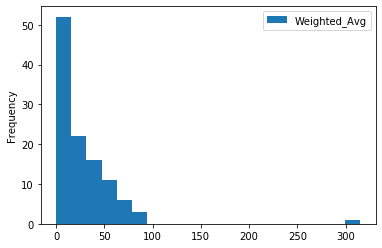

In [133]:
w_avg.plot(kind='hist', bins=20);

In [136]:
w_avg = sns.load_dataset("w_avg") 
ax = sns.scatterplot(x='ACCOUNT', y='Weighted_Avg', data=w_avg)

HTTPError: HTTP Error 404: Not Found

In [161]:
WA_top10 = w_avg.sort_values(by='Weighted_Avg').tail(11)
WA_top10

,Weighted_Avg
ACCOUNT,
large,62.543566
treviso,65.549359
spring,66.914655
winged,68.136955
crab,70.027791
shell,70.703704
josephine,73.238630
blackberries,82.596867
cep,85.169060


In [147]:
best_groups[best_groups['ACCOUNT']=='treviso'].max()

JOBID                       9555621
ACCOUNT                     treviso
USER                         kolton
REQMEM                        20480
USEDMEM                       19009
REQTIME                      216000
USEDTIME                     145310
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-04T09:47:59
memory_usage                99.9995
PCT_Actual                  99.9995
dtype: object

In [148]:
best_groups[best_groups['ACCOUNT']=='spring'].max()

JOBID                       9293822
ACCOUNT                      spring
USER                           olga
REQMEM                        20480
USEDMEM                       14513
REQTIME                      720000
USEDTIME                     140946
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-06-21T16:35:50
memory_usage                    100
PCT_Actual                      100
dtype: object

In [149]:
best_groups[best_groups['ACCOUNT']=='winged'].max()

JOBID                   9840460_941
ACCOUNT                      winged
USER                        violeta
REQMEM                        20480
USEDMEM                       19777
REQTIME                     1152000
USEDTIME                     240607
NODES                             1
CPUS                              8
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-23T23:42:38
memory_usage                    100
PCT_Actual                      100
dtype: object

In [150]:
best_groups[best_groups['ACCOUNT']=='crab'].max()

JOBID                    9849476_92
ACCOUNT                        crab
USER                        shannon
REQMEM                        20000
USEDMEM                        5754
REQTIME                     1209600
USEDTIME                     634018
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-25T13:06:24
memory_usage                99.9999
PCT_Actual                  99.9999
dtype: object

In [151]:
best_groups[best_groups['ACCOUNT']=='shell'].max()

JOBID                       9850113
ACCOUNT                       shell
USER                          penny
REQMEM                        20480
USEDMEM                       20042
REQTIME                       72000
USEDTIME                      71064
NODES                             1
CPUS                             16
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-19T15:38:01
memory_usage                99.9998
PCT_Actual                  99.9998
dtype: object

In [152]:
best_groups[best_groups['ACCOUNT']=='josephine'].max()

JOBID                      10873951
ACCOUNT                   josephine
USER                        natalie
REQMEM                         3072
USEDMEM                        2986
REQTIME                      864000
USEDTIME                     461034
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-08-15T00:29:19
memory_usage                99.9998
PCT_Actual                  99.9998
dtype: object

In [153]:
best_groups[best_groups['ACCOUNT']=='blackberries'].max()

JOBID                    11756384_9
ACCOUNT                blackberries
USER                         kalene
REQMEM                         4096
USEDMEM                        4094
REQTIME                       96300
USEDTIME                      57258
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-05T10:26:53
memory_usage                99.9548
PCT_Actual                  99.9548
dtype: object

In [154]:
best_groups[best_groups['ACCOUNT']=='cep'].max()

JOBID                       8082628
ACCOUNT                         cep
USER                         eldora
REQMEM                        19200
USEDMEM                       17500
REQTIME                     1209600
USEDTIME                     551596
NODES                             1
CPUS                             12
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-05-01T08:13:09
memory_usage                91.1485
PCT_Actual                  91.1485
dtype: object

In [155]:
best_groups[best_groups['ACCOUNT']=='shiny'].max()

JOBID                       8493373
ACCOUNT                       shiny
USER                          arlie
REQMEM                        20480
USEDMEM                       15360
REQTIME                      183600
USEDTIME                       5734
NODES                             1
CPUS                              7
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-05-17T16:45:41
memory_usage                    100
PCT_Actual                      100
dtype: object

In [156]:
best_groups[best_groups['ACCOUNT']=='blood'].max()

JOBID                       7742321
ACCOUNT                       blood
USER                         jonnie
REQMEM                         1024
USEDMEM                        3363
REQTIME                        1800
USEDTIME                        796
NODES                             1
CPUS                              1
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-04-12T14:57:56
memory_usage                328.423
PCT_Actual                  328.423
dtype: object

In [162]:
best_groups[best_groups['ACCOUNT']=='large'].max()

JOBID                       8109815
ACCOUNT                       large
USER                        margret
REQMEM                         8192
USEDMEM                        3968
REQTIME                       86400
USEDTIME                      60008
NODES                             1
CPUS                             16
PARTITION                production
EXITCODE                        0:0
SUBMIT          2019-09-23T22:16:12
memory_usage                78.5848
PCT_Actual                  78.5848
dtype: object

In [170]:
import plotly.graph_objects as go
accounts=['large','treviso', 'spring', 'winged','crab','shell','josephine','blackberries','cep','shiny']

fig = go.Figure(data=[
    go.Bar(name='Weighted Average', x=accounts, y=[62.543566, 65.549359, 66.914655, 68.136955, 70.027791, 70.703704, 73.238630, 82.596867, 85.169060, 90.519860], text=y, textposition='auto'),
    go.Bar(name='Memory Usage', x=accounts, y=[78.5848, 99.9995, 100, 100, 99.9999, 99.9998,99.9998, 99.9548, 91.1485, 100], text=y, textposition='auto')
])
# Change the bar mode
fig.update_layout(barmode='group')
#fig.update_layout(title_text='Top 10 Most Wasteful Accounts')
fig.update_layout(
    title='Top 10 Most Wasteful Accounts',
    xaxis=dict(
        title='Accounts',
        titlefont_size=16
    ),
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    )) 
    
fig.show()
# Note that this excludes the account named 'blood'